# EDA & ML on Diabetes

## Import Libraries And Load The Data

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Replace Zeros NaN And Than With Mean Value

In [60]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [61]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

## EDA 

## Analysis Of Results With Diabetes

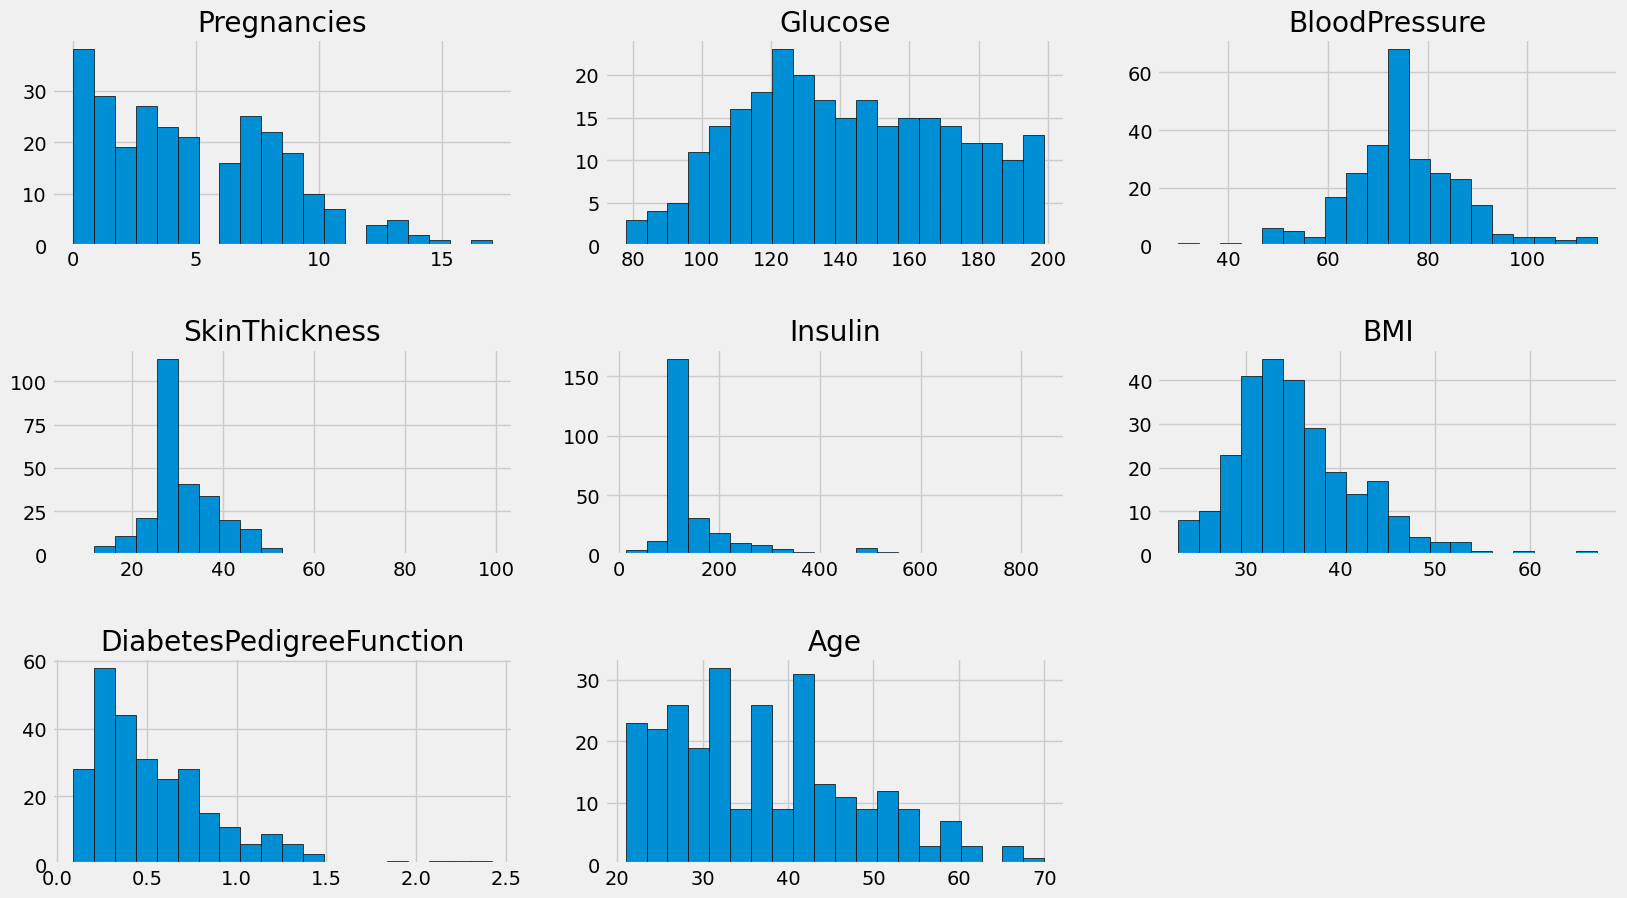

In [66]:
data1=data_copy[data['Outcome']==1]
columns=data_copy.columns[:8]
plt.subplots(figsize=(18,14))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

## Distribution of The Features

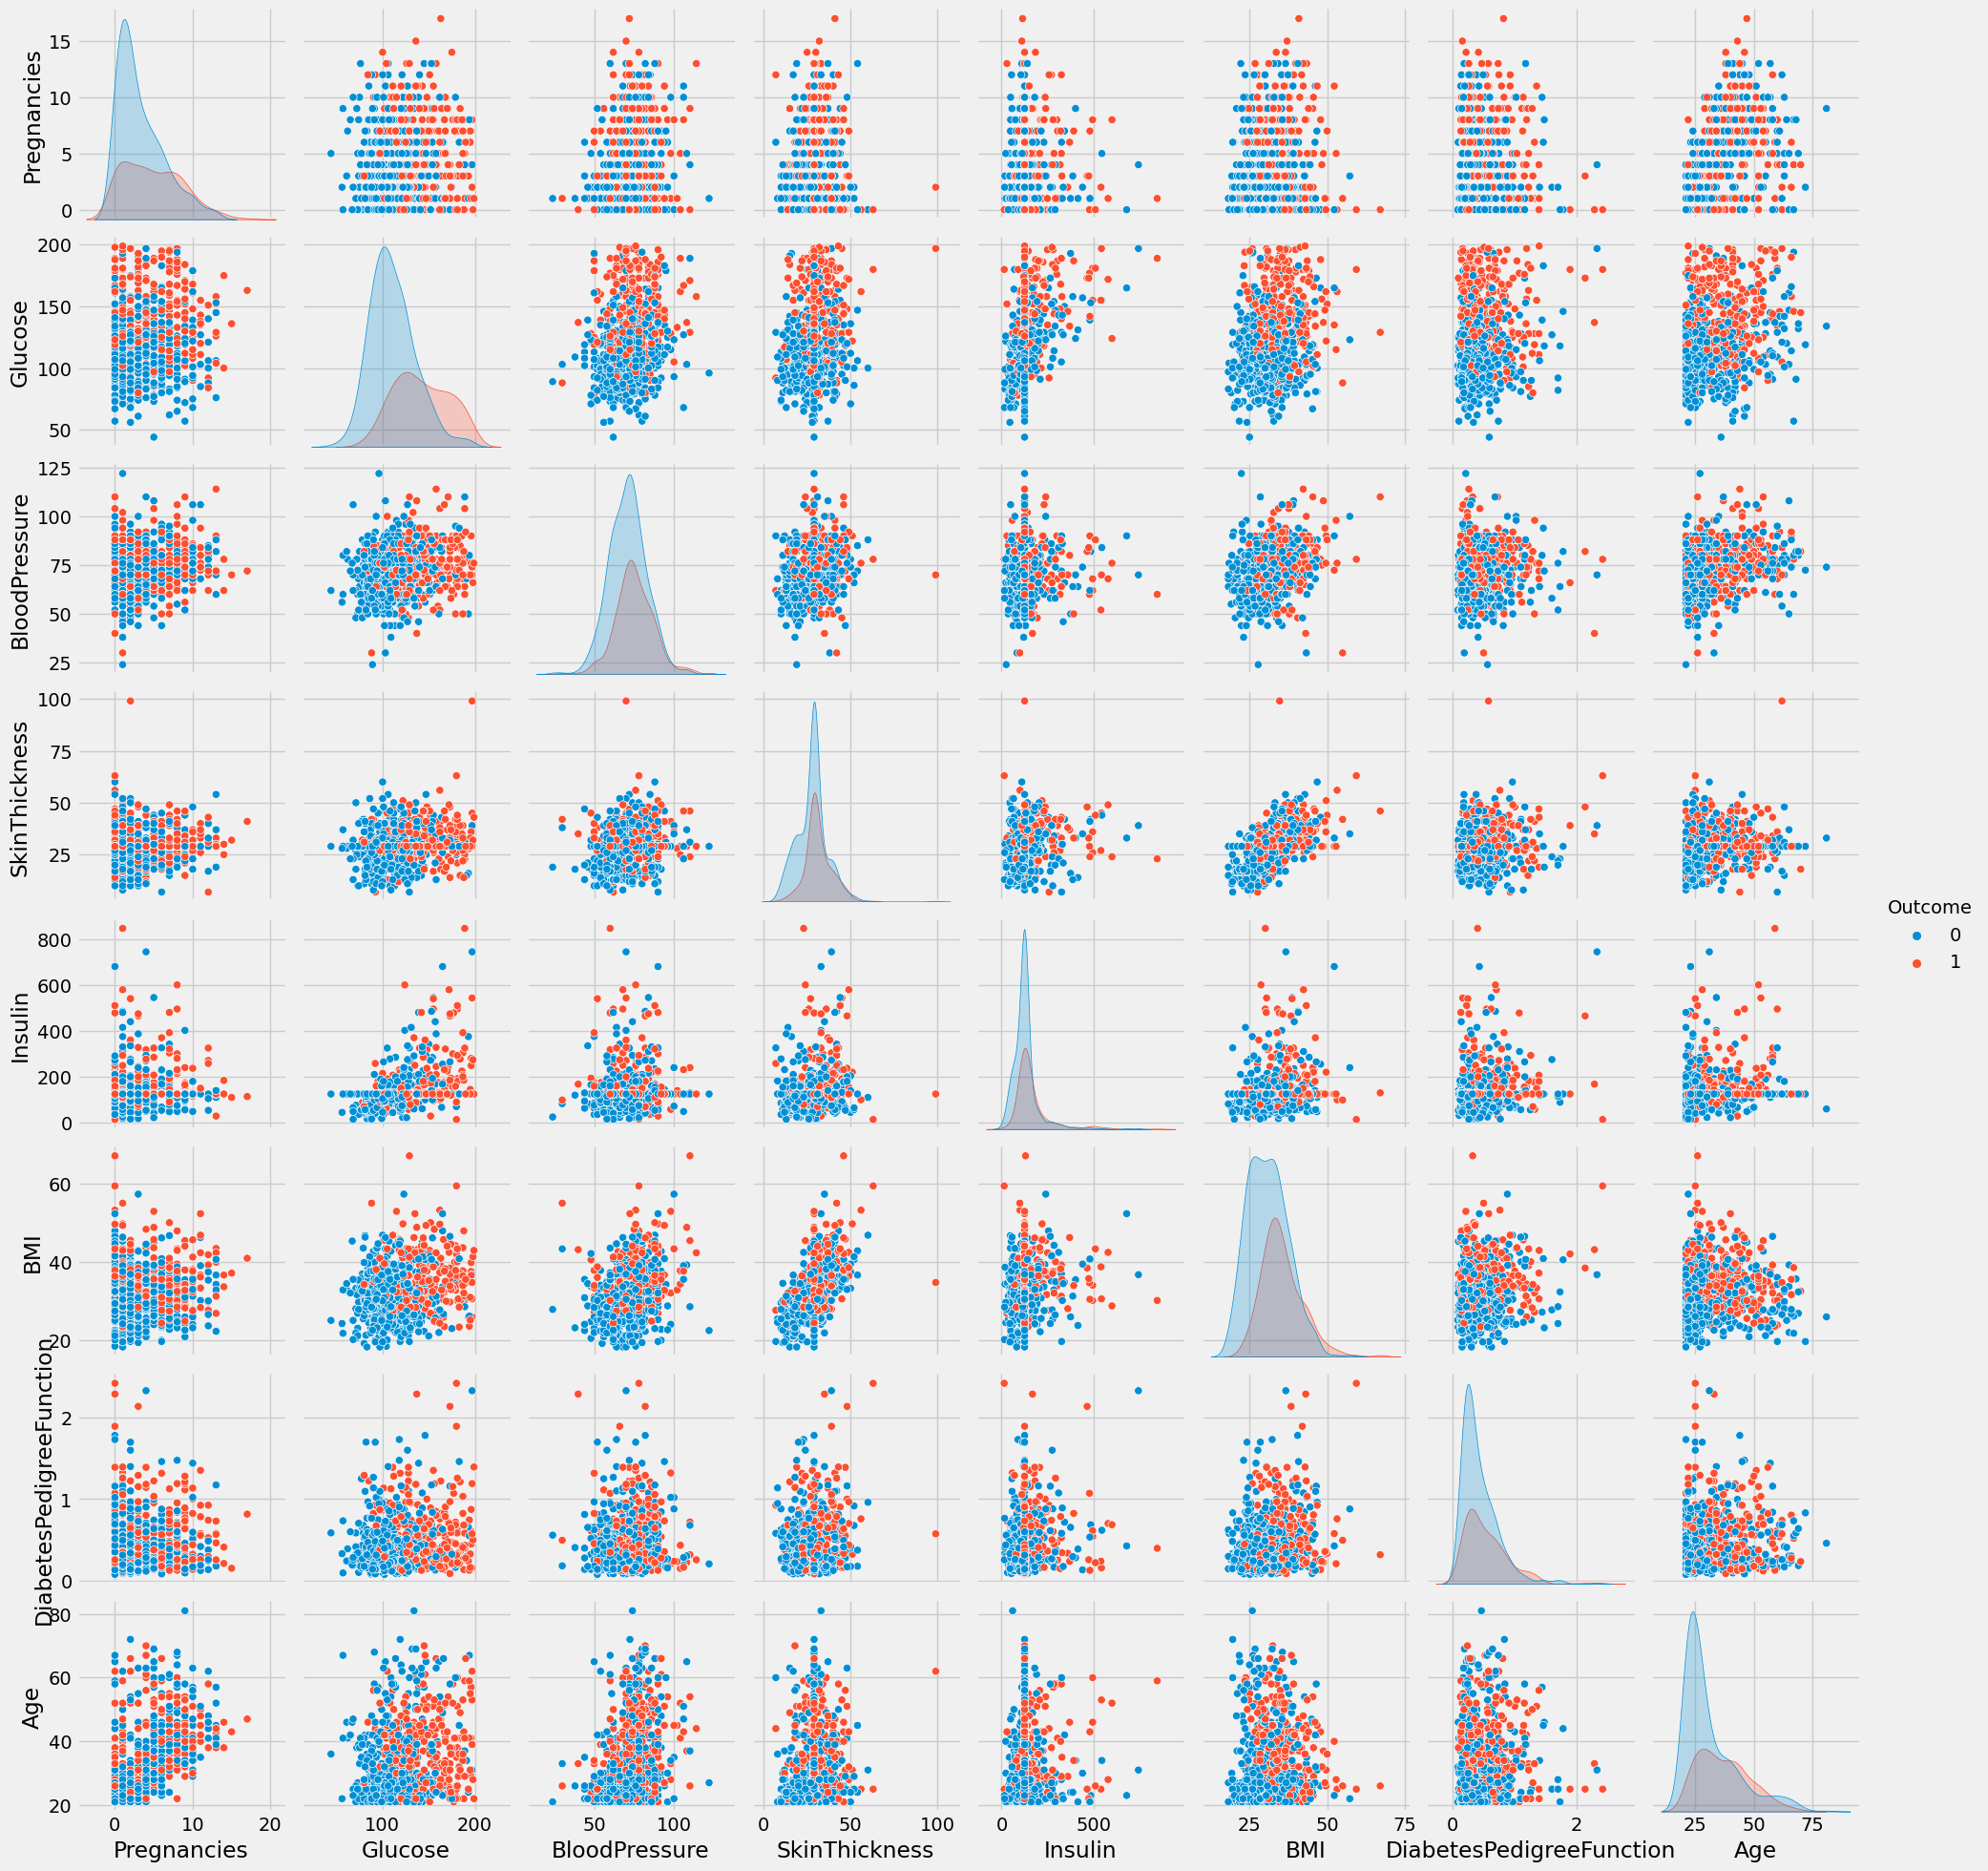

In [71]:
sns.pairplot(data=data_copy,hue='Outcome',diag_kind='kde') #plot uncleaned data
plt.show()

## Heatmap For Features Correlation

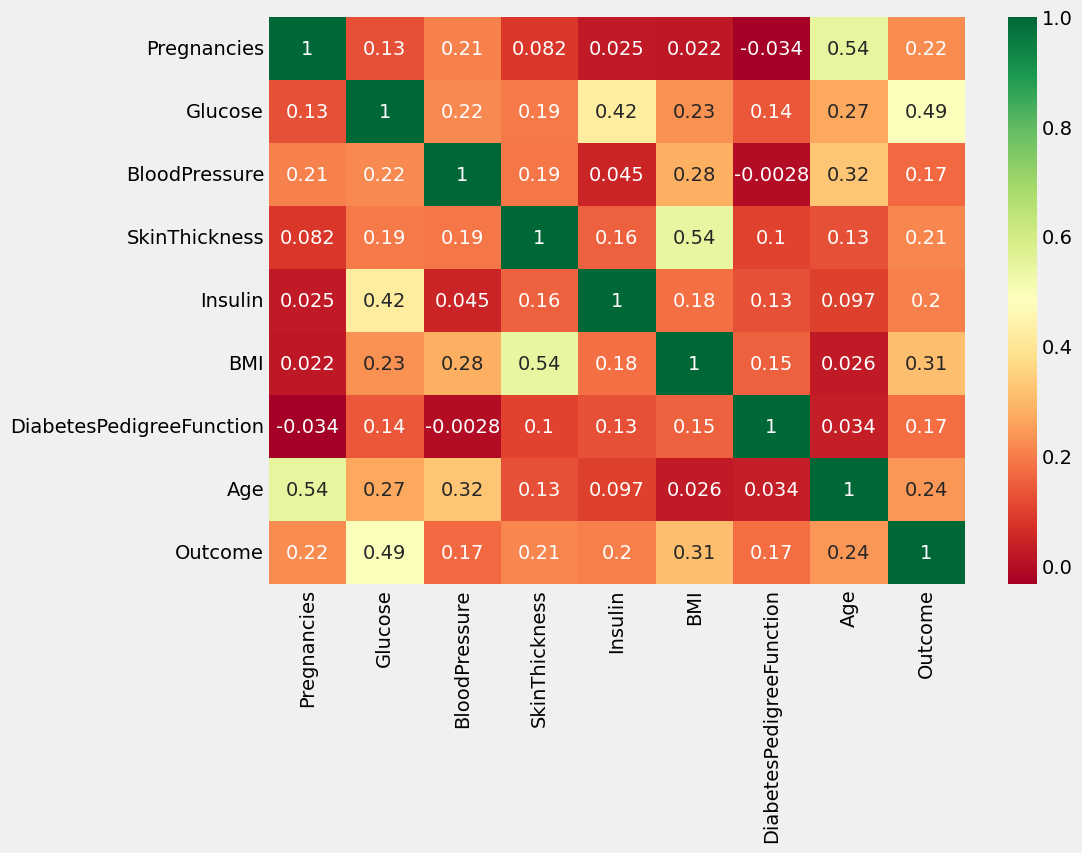

In [81]:
plt.figure(figsize=(10,7))  
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn') 

## ML Models

In [82]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

### Data Normalization

In [89]:
sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = data_copy.Outcome

In [91]:
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584


### Test and Train Data 

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [96]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

(576, 8)
(576,)
(192,)
(192, 8)


## SVM Model

In [99]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,y_test))

Accuracy for SVM kernel= rbf is 0.734375
Accuracy for SVM kernel= linear is 0.7135416666666666


## Logistic Regression

In [101]:
model = LogisticRegression()

model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('Accuracy for Logistic Regression is',metrics.accuracy_score(prediction,y_test))

Accuracy for Logistic Regression is 0.7239583333333334


## Decision Tree

In [102]:
model=DecisionTreeClassifier()

model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('Accuracy for Decision Tree is',metrics.accuracy_score(prediction,y_test))

Accuracy for Decision Tree is 0.7291666666666666


## K-Nearest Neighbours

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


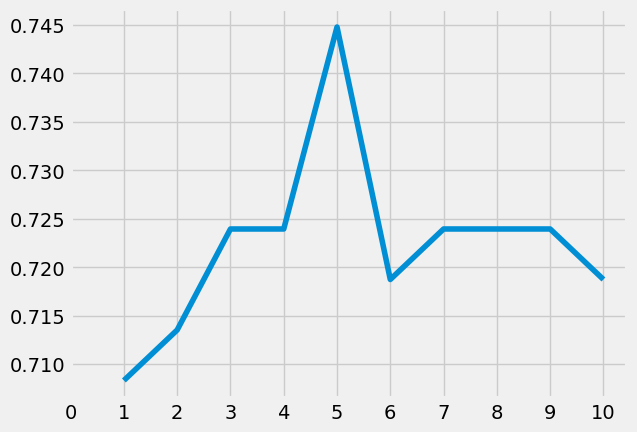

Accuracies for different values of n are: [0.70833333 0.71354167 0.72395833 0.72395833 0.74479167 0.71875
 0.72395833 0.72395833 0.72395833 0.71875   ]


In [103]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

### The Best Result is at k = 5

In [104]:
knn = KNeighborsClassifier(5)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7447916666666666

In [111]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN 5','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values('Accuracy', ascending=True)

,Accuracy
Decision Tree,0.697917
Linear Svm,0.713542
Logistic Regression,0.723958
Radial Svm,0.734375
KNN 5,0.744792


End of Analysis